In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
hp = pd.read_csv('Happiness1521.csv')
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1084 non-null   int64  
 1   Region      1084 non-null   object 
 2   Country     1084 non-null   object 
 3   Score       1084 non-null   float64
 4   Economy     1084 non-null   float64
 5   Social      1084 non-null   float64
 6   Health      1084 non-null   float64
 7   Freedom     1084 non-null   float64
 8   Generosity  1084 non-null   float64
 9   Corruption  1084 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 84.8+ KB


### 데이터 피처 분석
- Year : 연도
- Region : 구역(대륙)
- Country : 나라이름
- Score : 행복 점수
- Economy : GDP
- Social : 가족 및 친구
- Health : 건강(기대수명)
- Freedom : 자유도
- Generosity : 자선(기부)
- Corruption : 부패(정부)

In [4]:
spearman_cormatrix= hp.corr(method='spearman')
spearman_cormatrix

,Year,Score,Economy,Social,Health,Freedom,Generosity,Corruption
Year,1.000000,0.048606,0.021976,0.050588,0.024136,0.177784,-0.196758,-0.034471
Score,0.048606,1.000000,0.801784,0.616355,0.748739,0.554815,0.089054,0.281760
Economy,0.021976,0.801784,1.000000,0.556508,0.774275,0.376308,-0.039611,0.232594
Social,0.050588,0.616355,0.556508,1.000000,0.632395,0.354724,-0.018901,0.047232
Health,0.024136,0.748739,0.774275,0.632395,1.000000,0.350630,-0.012857,0.166818
Freedom,0.177784,0.554815,0.376308,0.354724,0.350630,1.000000,0.271232,0.401597
Generosity,-0.196758,0.089054,-0.039611,-0.018901,-0.012857,0.271232,1.000000,0.245945
Corruption,-0.034471,0.281760,0.232594,0.047232,0.166818,0.401597,0.245945,1.000000


In [5]:
import seaborn as sns

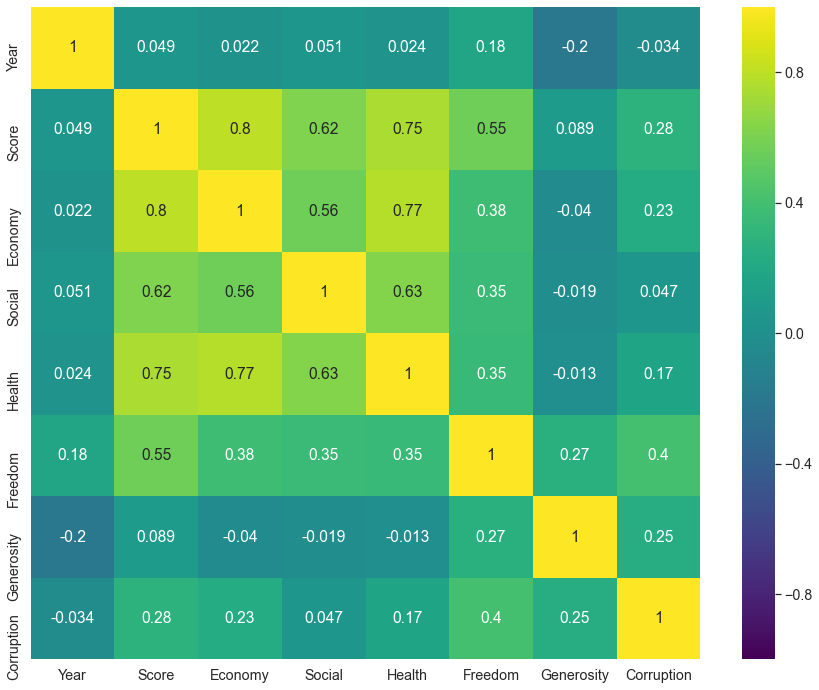

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)
sns.set(font_scale = 1.3)
plt.show()

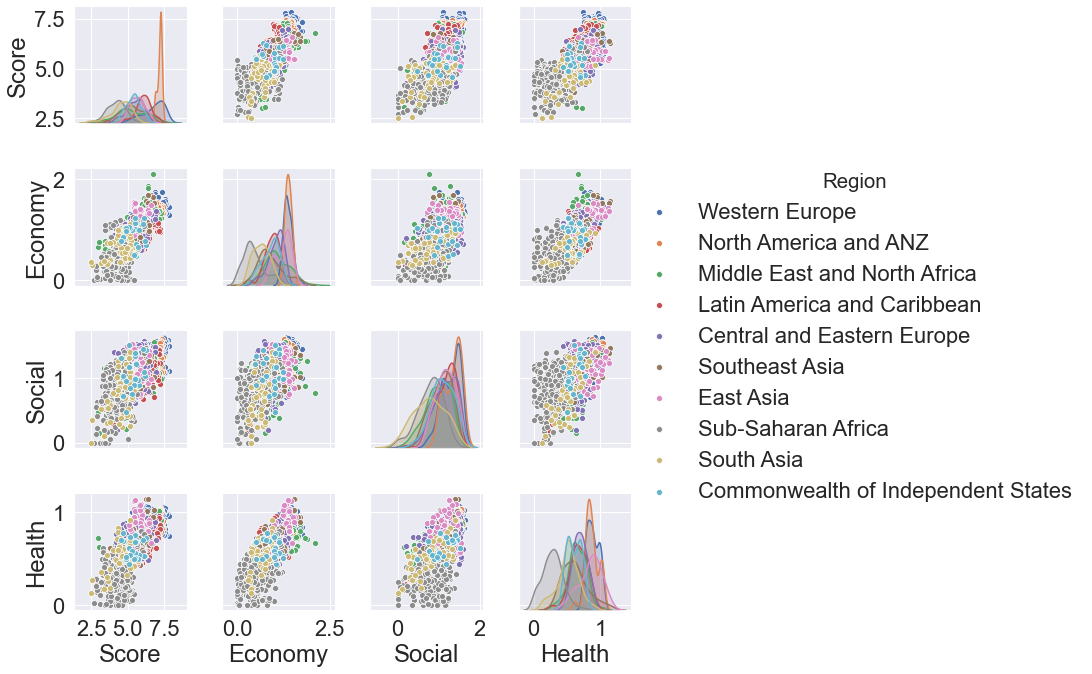

In [22]:
df = hp[['Region','Score', 'Economy', 'Social', 'Health']]

sns.pairplot(df, diag_kind='kde', hue='Region')
sns.set(font_scale = 2)
plt.show()

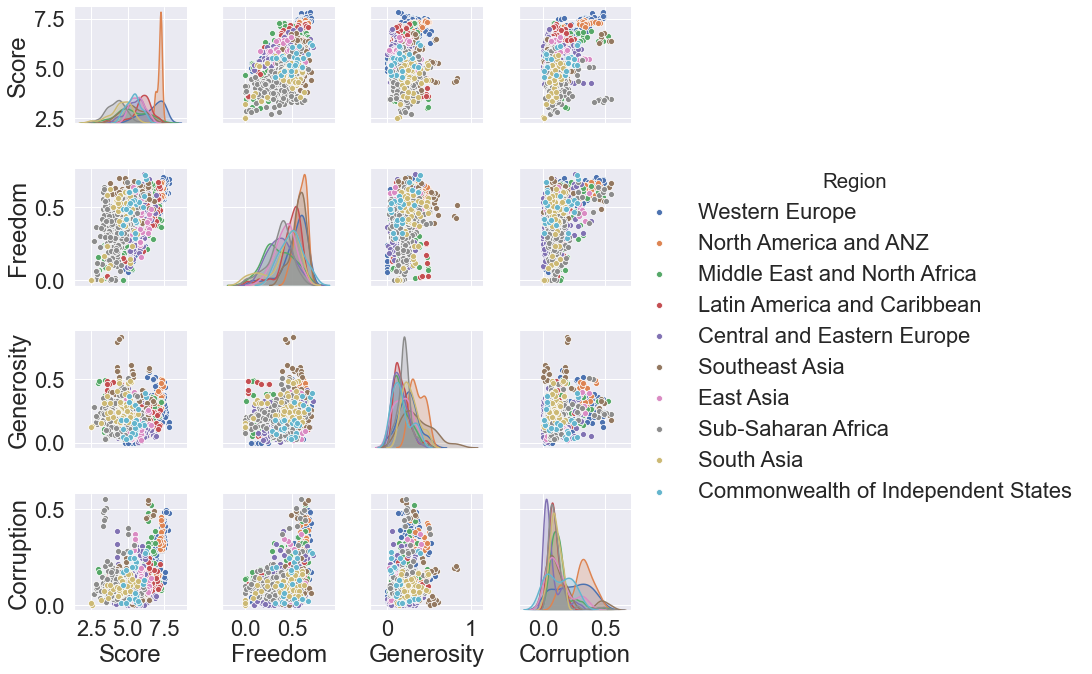

In [23]:
df = hp[['Region','Score', 'Freedom', 'Generosity', 'Corruption']]

sns.pairplot(df, diag_kind='kde', hue='Region')
sns.set(font_scale = 2)
plt.show()

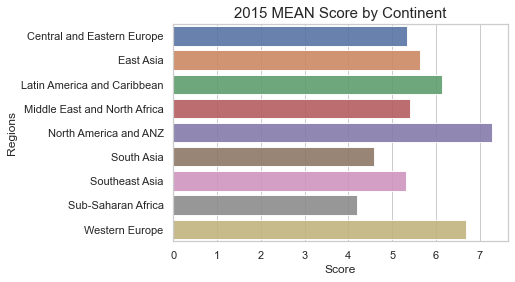

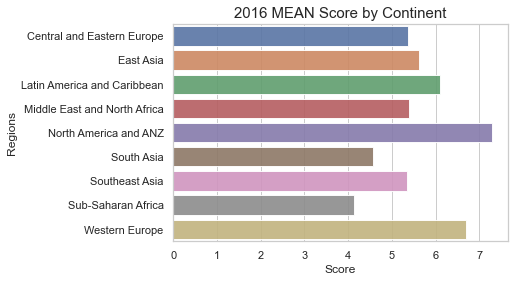

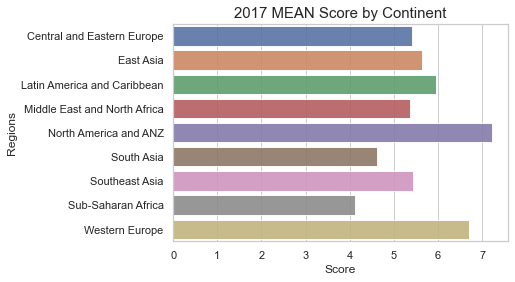

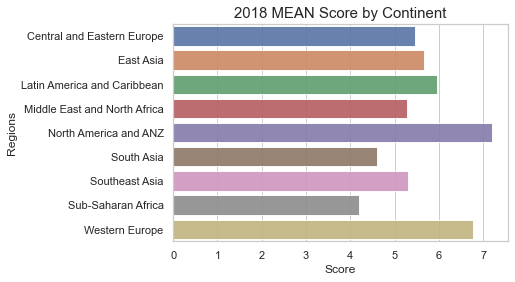

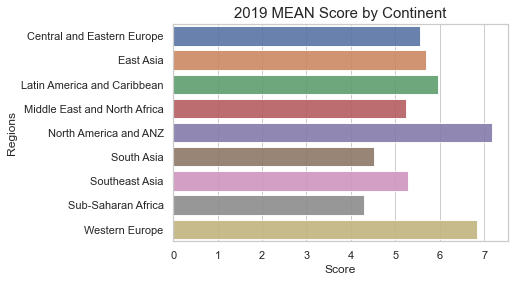

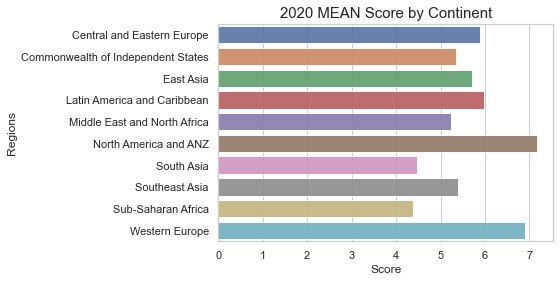

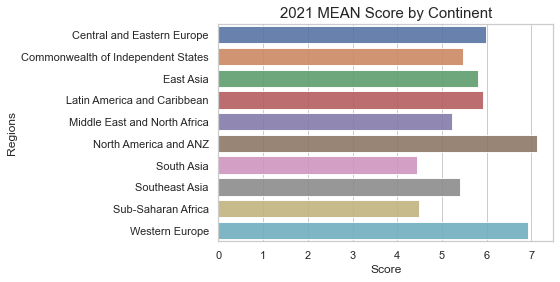

In [120]:
for year in range(2015, 2022):
    reg_data = hp[hp['Year']==year].groupby('Region')['Score'].mean()
    sns.set(style="whitegrid")
    sns.barplot(reg_data.values.tolist(), reg_data.index.tolist(), alpha=0.9)
    plt.title(str(year)+' MEAN Score by Continent', fontsize=15)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Regions', fontsize=12)
    plt.show()

In [110]:
hp.set_index(['Region', 'Year'])

Country  Score   Economy    Social    Health  \
Region             Year                                                     
Western Europe     2017       Norway  7.537  1.616463  1.533524  0.796667   
                   2017      Denmark  7.522  1.482383  1.551122  0.792566   
                   2017      Iceland  7.504  1.480633  1.610574  0.833552   
                   2017  Switzerland  7.494  1.564980  1.516912  0.858131   
                   2017      Finland  7.469  1.443572  1.540247  0.809158   
...                              ...    ...       ...       ...       ...   
Sub-Saharan Africa 2021      Lesotho  3.512  0.451000  0.731000  0.007000   
                   2021     Botswana  3.467  1.099000  0.724000  0.340000   
                   2021       Rwanda  3.415  0.364000  0.202000  0.407000   
                   2021     Zimbabwe  3.145  0.457000  0.649000  0.243000   
South Asia         2021  Afghanistan  2.523  0.370000  0.000000  0.126000   

                          Freedom  Generosity  Corruption  
Region             Year                                    
Western Europe     2017  0.635423    0.362012    0.315964  
                   2017  0.626007    0.355280    0.400770  
                   2017  0.627163    0.475540    0.153527  
                   2017  0.620071    0.290549    0.367007  
                   2017  0.617951    0.245483    0.382612  
...                           ...         ...         ...  
Sub-Saharan Africa 2021  0.405000    0.103000    0.015000  
                   2021  0.539000    0.027000    0.088000  
                   2021  0.627000    0.227000    0.493000  
                   2021  0.359000    0.157000    0.075000  
South Asia         2021  0.000000    0.122000    0.010000  

[1084 rows x 8 columns]

In [13]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [14]:
map_plot = dict(type = 'choropleth', 
                locations = hp['Country'],
                locationmode = 'country names',
                z = hp['Score'], 
                text = hp['Region'],
                colorscale = 'Viridis', reversescale = True)
layout = dict(title = 'Happiest Countries In The World ', 
              geo = dict(showframe = False, 
                         projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [map_plot], layout=layout)
iplot(choromap, validate=False)